#Archisha Sinha

##Domain: Computer Vision
##Topic: Gabor Filter Implementation

## Experiment 7: Apply Gabor filter to identify edges

Task 1: Generate a Gabor filter

Task 2: Vary parameters and observe the effects

Task 3: Apply Gabor filters on the given hidden image to extract original image

Task 4: Apply Gabor filters on image, Brick to identify edges in different directions

- Gabor Filter is a multiplication of Sine wave and Gaussian Curve.
- A Gabor filter is a type of detector used in image processing to identify small, localized cloud patterns in satellite images by covering the entire image with a large number of these filters with different receptive fields.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Task 1: Generate a Gabor filter

### Parametrs to apply Gabor Filter

In [56]:
k_size = 101  #size of the Gabor filter kernel (should be odd to have a center pixel)
sigma = 5      #SD of the Gaussian envelope, controls the width of the filter [if the sigma value is changed to 10 from 5, then the gaussian curve willbe broadend]
theta = 0     # Orientation of the filter in radians [if theta is changed from 0 to pi/2 then the filter gets rotated to some angle.]
lamda = 10        # Wavelength of the cosine factor [if it is reduced to 5 from 10, then we'll see more peaks of the filter]
gamma = 0.5  # Aspect ratio, defines the ellipticity of the filter (1 for circular) [if we make it 0,
                #then we see only staright lines, thus only the peak of the filter will be taken, and the size of the filter will be very small]
psi = 0 #offset of sine wave

In [54]:
kernel = cv2.getGaborKernel((k_size, k_size), sigma, theta, lamda, gamma, psi)

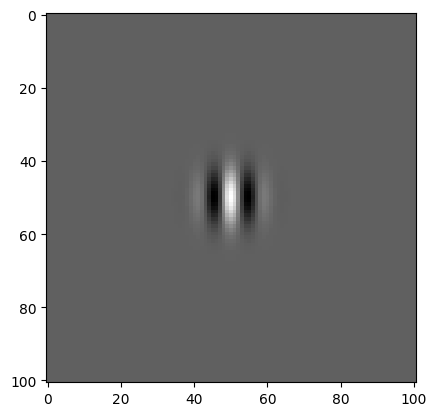

In [55]:
plt.imshow(kernel, cmap='gray')

In [14]:
print(kernel)

[[-3.71174154e-19 -5.28644049e-19 -7.09368500e-19 ...  4.21049095e-36
   1.10252964e-36  2.29026486e-37]
 [-4.22688269e-19 -9.95616004e-19 -1.75759443e-18 ...  6.69198741e-35
   2.24472674e-35  7.11224135e-36]
 [ 3.66247976e-18  2.64429268e-18  7.75424964e-19 ...  6.43220174e-34
   2.43933127e-34  8.84895747e-35]
 ...
 [ 8.84895747e-35  2.43933127e-34  6.43220174e-34 ...  7.75424964e-19
   2.64429268e-18  3.66247976e-18]
 [ 7.11224135e-36  2.24472674e-35  6.69198741e-35 ... -1.75759443e-18
  -9.95616004e-19 -4.22688269e-19]
 [ 2.29026486e-37  1.10252964e-36  4.21049095e-36 ... -7.09368500e-19
  -5.28644049e-19 -3.71174154e-19]]


###Conclusion 1:

- Gabor Filter [GF] with k_size (filter size) = 101, SD = 5, orientation = 0, wavelength = 10, elipticity = 0.5, and Offset = 0; is generated
- If SD (sigma) is increased from 5 to 10, then the no of strips increases.
- If orientation (theta) is changed from 0 to 90 degree, then the filter rotates to 90 wrt to vertical axis.
- If wavelength (lamda) is reduced from 10 to 5, then the no of peaks increases.
- If elipticity (gamma) is reduced from 0.5 to 0, then the strips of filter are uniform in the vertical direction.
- If elipticity (gamma) is increased from 0.5 to 0.8 or larger, then the width of filter is increased and the height of the filter reduces.




## Task 2: Vary parameters and observe the effects

In [81]:
img = cv2.imread('/content/drive/MyDrive/Archisha- Semester 7/AA-Labs/CV/hidden_image.JPG')

In [82]:
#converting image to gray
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

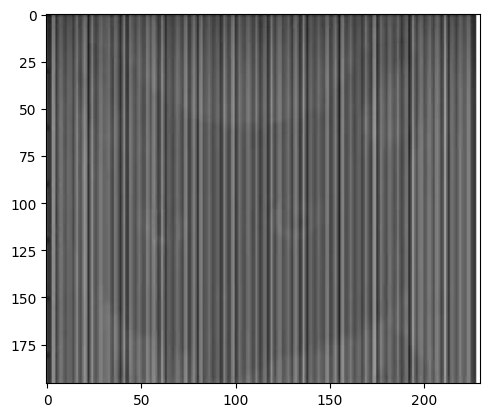

In [83]:
plt.imshow(img, cmap = 'gray')

In [109]:
k_size = 25
sigma = 5
theta = np.pi/2
lamda = 20
gamma = 0.5
psi = 0

In [110]:
kernel = cv2.getGaborKernel((k_size, k_size), sigma, theta, lamda, gamma, psi)

In [111]:
# normalizing the kernel, by dividing by the largest value, so that max value is 1:
kernel = kernel / kernel.sum()

## Task 3: Apply Gabor filters on the given hidden image to extract original image

Now we will apply the filter in the image

In [112]:
filtered_img = cv2.filter2D(img, -1, kernel)

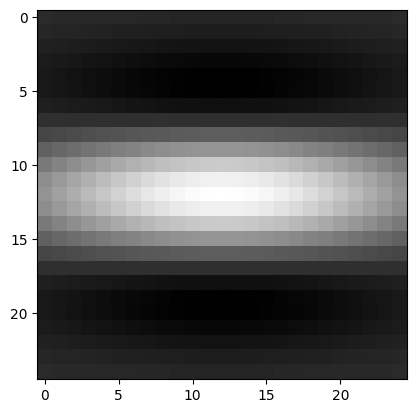

In [113]:
plt.imshow(kernel, cmap='gray')

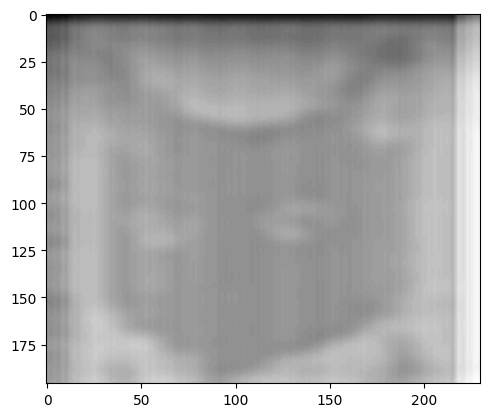

In [114]:
plt.imshow(filtered_img, cmap='gray')

Text(0.5, 1.0, 'Filtered Image')

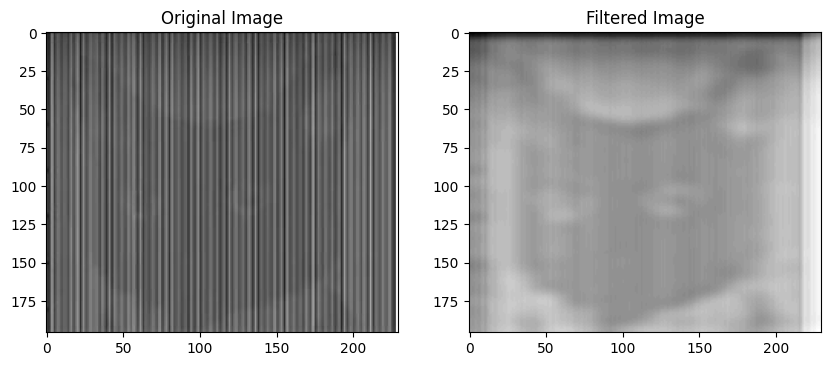

In [115]:
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(filtered_img, cmap='gray')
plt.title('Filtered Image')

Conclusion 2:
- Given hidden image has several vertical stripes that has to be eliminated.
- By applying GF with k_size (filtersize)  = 25 , sigma (SD) = 2, theta (Orientation) = 90 deg, lamda(wavelength)= 10 , gamma (elipticity) = 0.5 , psi (phase offset) = 0
- The filtered images show few weak vertical edges, to reduce the vertical edges, the SD has increased from 2 to 5 and wavelength has increased from 10 to 20. [ thus: k_size (filtersize)  = 25 , sigma (SD) = 5, theta (Orientation) = 90 deg, lamda(wavelength)= 20 , gamma (elipticity) = 0.5 , psi (phase offset) = 0]
- The filtered img shows an improved version of the previous image.
-

## Task 4: Apply Gabor filters on image, Brick to identify edges in different directions

In [116]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

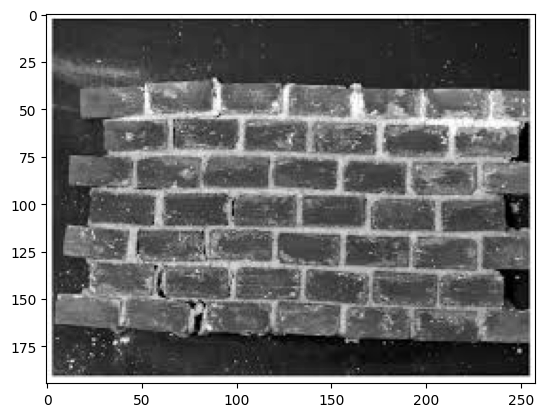

In [119]:
# Load the Brick image
image = cv2.imread('/content/drive/MyDrive/Archisha- Semester 7/AA-Labs/CV/brick image.jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')

In [118]:
# Define Gabor filter parameters
k_size = 101  # Size of the Gabor filter kernel (must be odd)
sigma = 5     # Standard deviation of the Gaussian envelope
lamda = 10    # Wavelength of the cosine factor
gamma = 0.5   # Aspect ratio
psi = 0       # Phase offset

In [120]:
# List to hold the results
filtered_images = []
thetas = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # Different orientations in radians

In [121]:
# Apply Gabor filter for each theta
for theta in thetas:
    # Generate the Gabor filter
    kernel = cv2.getGaborKernel((k_size, k_size), sigma, theta, lamda, gamma, psi)

    # Convolve the image with the Gabor filter
    filtered_image = cv2.filter2D(image, cv2.CV_8UC3, kernel)

    # Append the result to the list
    filtered_images.append(filtered_image)

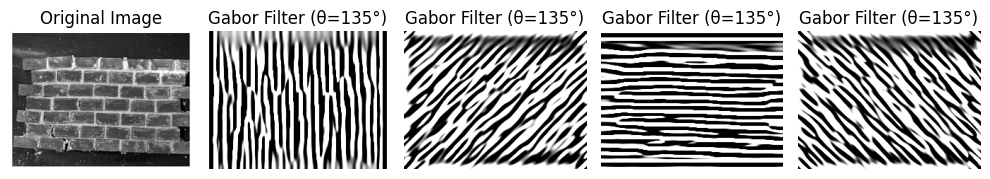

In [122]:
plt.figure(figsize=(10, 8))
plt.subplot(1, len(filtered_images) + 1, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Display each filtered image
for i, filtered_image in enumerate(filtered_images):
    plt.subplot(1, len(filtered_images) + 1, i + 2)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'Gabor Filter (θ={int(theta*180/np.pi)}°)')
    plt.axis('off')

plt.tight_layout()
plt.show()

Applying Gabor filters at various orientations effectively highlights edges in the Brick image, showcasing the filter's sensitivity to different directional features. This technique enhances image analysis by revealing structural details that may not be easily discernible in the original image.